In [1]:
from BurstCube.bcSim import simFiles

* Made a new directory, test2, to simulate a config file with energies of 25 to 1000 keV with incidence of 15 degrees.
* Bins = 3

In [2]:
sfs = simFiles('../test2/config.yaml')

Loading /home/laura/Simulation/BurstCube/data/test2//test_25.000keV_15.00ze_0.00az.inc1.id1.sim
Loading /home/laura/Simulation/BurstCube/data/test2//test_158.114keV_15.00ze_0.00az.inc1.id1.sim
Loading /home/laura/Simulation/BurstCube/data/test2//test_1000.000keV_15.00ze_0.00az.inc1.id1.sim
Loading /home/laura/Simulation/BurstCube/data/test2//test_25.000keV_15.00ze_30.00az.inc1.id1.sim
Loading /home/laura/Simulation/BurstCube/data/test2//test_158.114keV_15.00ze_30.00az.inc1.id1.sim
Loading /home/laura/Simulation/BurstCube/data/test2//test_1000.000keV_15.00ze_30.00az.inc1.id1.sim
Loading /home/laura/Simulation/BurstCube/data/test2//test_25.000keV_15.00ze_60.00az.inc1.id1.sim
Loading /home/laura/Simulation/BurstCube/data/test2//test_158.114keV_15.00ze_60.00az.inc1.id1.sim
Loading /home/laura/Simulation/BurstCube/data/test2//test_1000.000keV_15.00ze_60.00az.inc1.id1.sim


In [3]:
#made the energy array 
import numpy as np
energies = np.empty([len(sfs.sims)])
for i, S in enumerate(sfs.sims):
    energies[i] = S.energy

In [4]:
area = sfs.calculateAeff(useEres=False, sigma=2.0)

In [5]:
print(area)

[( 0., 15.,   25.     , 30.202045, 30.11144  , 30.11144 )
 ( 0., 15.,  158.11388, 77.10565 , 70.39746  , 74.02142 )
 ( 0., 15., 1000.     , 36.66949 , 13.8977375, 27.868813)
 (30., 15.,   25.     , 30.139345, 29.988647 , 29.988647)
 (30., 15.,  158.11388, 78.408875, 72.4498   , 75.42934 )
 (30., 15., 1000.     , 36.641262, 13.887039 , 27.84736 )
 (60., 15.,   25.     , 30.139345, 29.988647 , 29.988647)
 (60., 15.,  158.11388, 80.320526, 75.58161  , 78.553474)
 (60., 15., 1000.     , 35.731586, 12.684713 , 25.440891)]


In [6]:
sfs.sims

In [7]:
sfs.calculateAeff()

array([( 0., 15.,   25.     , 30.202045, 30.11144  , 30.11144 ),
       ( 0., 15.,  158.11388, 77.10565 , 70.39746  , 74.02142 ),
       ( 0., 15., 1000.     , 36.66949 , 13.8977375, 27.868813),
       (30., 15.,   25.     , 30.139345, 29.988647 , 29.988647),
       (30., 15.,  158.11388, 78.408875, 72.4498   , 75.42934 ),
       (30., 15., 1000.     , 36.641262, 13.887039 , 27.84736 ),
       (60., 15.,   25.     , 30.139345, 29.988647 , 29.988647),
       (60., 15.,  158.11388, 80.320526, 75.58161  , 78.553474),
       (60., 15., 1000.     , 35.731586, 12.684713 , 25.440891)],
      dtype=[('az', '<f4'), ('ze', '<f4'), ('keV', '<f4'), ('aeff', '<f4'), ('aeff_eres', '<f4'), ('aeff_eres_modfrac', '<f4')])

In [8]:
#Extracted the elements from the area array
aeff = sfs.calculateAeff()

gEres = list(aeff['aeff_eres'])
bEres = list(aeff['aeff_eres_modfrac'])
Area = list(aeff['aeff'])
azimuth = list(aeff['az'])

In [9]:
#plotting area against energy, azimuth is not constant (disregard title)
from BurstCube.plotSim import plotAeffvsEnergy
plotAeffvsEnergy(energies[0:3], Area[0:3], gEres[0:3], bEres[0:3], ze=15)
import matplotlib.pyplot as plt
plt.show()

<Figure size 800x600 with 1 Axes>

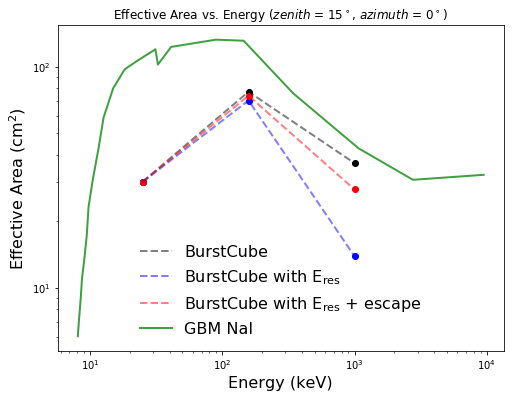

In [10]:
#plotting area against energy with GBM data, azimuth is not constant (disregard title)
plotAeffvsEnergy(energies[0:3], Area[0:3], gEres[0:3], bEres[0:3], ze=15, plotGBM=True)

In [11]:
zens = np.empty([len(sfs.sims)])
for i, S in enumerate(sfs.sims):
    zens[i] = S.zenith

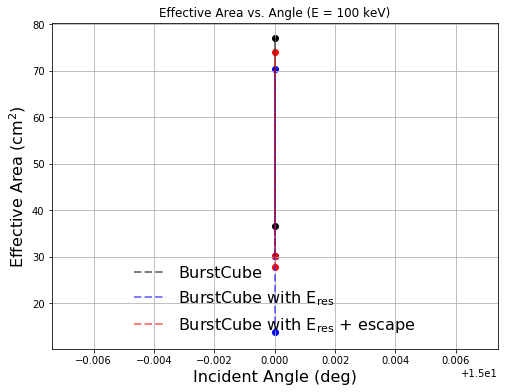

In [12]:
#plotted the effective area against the incidence, energy is not constant (disregard title)
from BurstCube.plotSim import plotAeffvsTheta
plotAeffvsTheta(zens[0:3], Area[0:3], gEres[0:3], bEres[0:3])

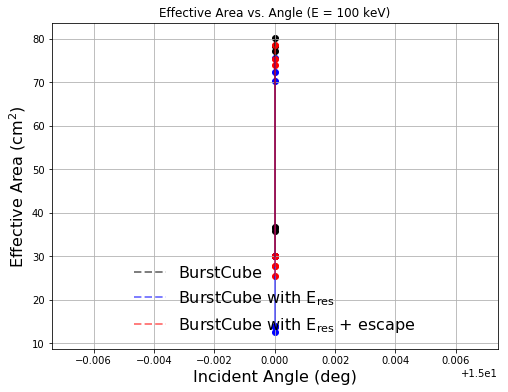

In [13]:
#plotted the effective area against the incidence, energy is not constant (disregard title)
from BurstCube.plotSim import plotAeffvsTheta
plotAeffvsTheta(zens, Area, gEres, bEres)

In [14]:
# #created a function to plot the effective area against the azimuth angle
# def plotAeffvsPhi(azimuth, aeff, aeff_eres, aeff_eres_modfrac,
#                     energy=100., paren=''):

#     """Plots the GBM NaI effective area against the polar angle phi used
#     to generate that source.
    
#     Parameters
#     ----------
#     azimuth : array
#        numpy array of the angle in deg of the source. 
#     aeff : array
#         numpy array with GBM NaI effective area. 
#     aeff_eres : array
#         I'll look up energy resulution later
#     aeff_eres_modfrac : array
#         plus escape? 
#     Returns
#     ----------
#     a plot!
#     """
#     plt.figure(figsize=(8, 6))
#     plt.title(r'Effective Area vs. Angle (E = {:,.0f} keV{})'
#               .format(energy, paren))
#     plt.scatter(azimuth, aeff, color='black')
#     plt.plot(azimuth, aeff, color='black', alpha=0.5, linestyle='--',
#              lw=2, label='BurstCube')
#     plt.scatter(azimuth, aeff_eres, color='blue')
#     plt.plot(azimuth, aeff_eres, color='blue', alpha=0.5, linestyle='--',
#              lw=2, label='BurstCube with E$_{\mathrm{res}}$')
#     plt.scatter(azimuth, aeff_eres_modfrac, color='red')
#     plt.plot(azimuth, aeff_eres_modfrac, color='red', alpha=0.5, linestyle='--',
#              lw=2, label='BurstCube with E$_{\mathrm{res}}$ + escape')

#     plt.xlabel('Azimuth Angle (deg)', fontsize=16)
#     plt.ylabel('Effective Area (cm$^2$)', fontsize=16)
#     plt.legend(loc='lower center', scatterpoints=1, prop={'size': 16},
#                frameon=False)
#     plt.axis('tight')
# plt.grid(True)

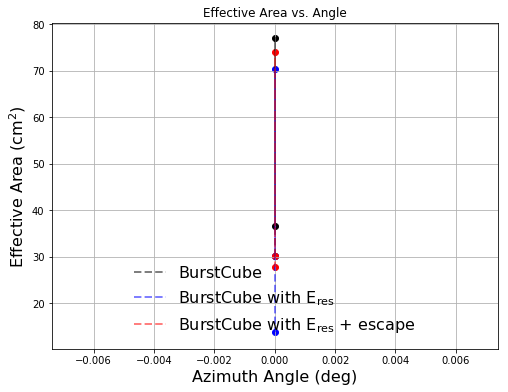

In [15]:
#plotted the effective area against the azimuth, energy is not constant (disregard title)
from BurstCube.plotSim import plotAeffvsPhi
plotAeffvsPhi(azimuth[0:3], Area[0:3], gEres[0:3], bEres[0:3])

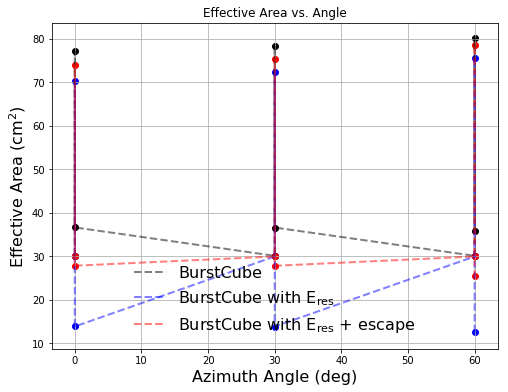

In [16]:
#plotted the effective area against the azimuth, energy is not constant (disregard title)
plotAeffvsPhi(azimuth, Area, gEres, bEres)